In [5]:
#!pip install arch

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [3]:
data = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-11-23,56304.554688,57875.515625,55632.761719,57569.074219,37485803899,0,0
2021-11-24,57565.851562,57803.066406,55964.222656,56280.425781,36635566789,0,0
2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,34284016248,0,0


In [9]:
df['LogRet']= np.log(df['Close']).diff()

In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogRet
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,-0.074643
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,-0.072402
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,0.035111
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,-0.024968


In [11]:
df2 = df.iloc[1:].copy()

<AxesSubplot:xlabel='Date'>

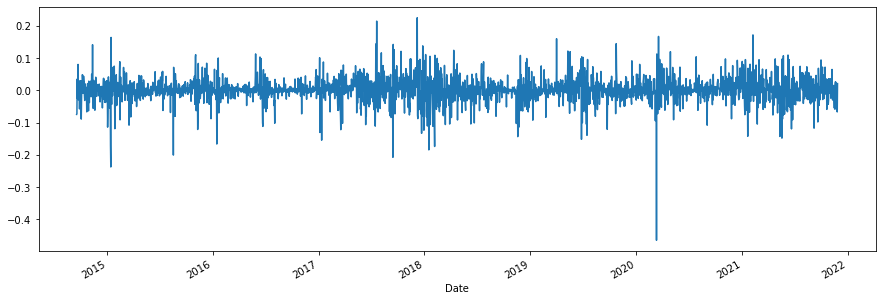

In [13]:
df2['LogRet'].plot(figsize=(15,5))

In [14]:
df2['Ysq'] = df['LogRet']**2

<AxesSubplot:xlabel='Date'>

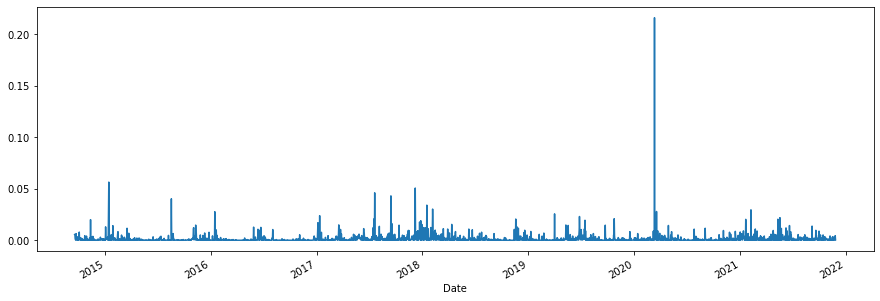

In [15]:
df2['Ysq'].plot(figsize=(15,5))

### ACF and PACF

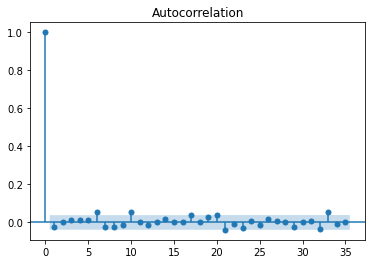

In [26]:
plot_acf(df2['LogRet']);

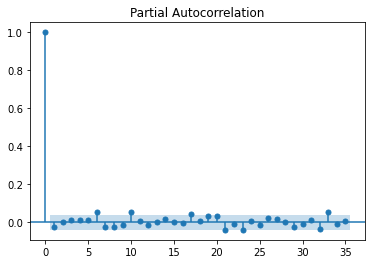

In [25]:
plot_pacf(df2['LogRet']);

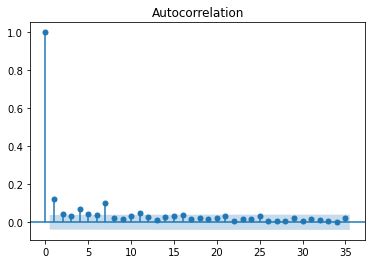

In [24]:
plot_acf(df2['Ysq']);

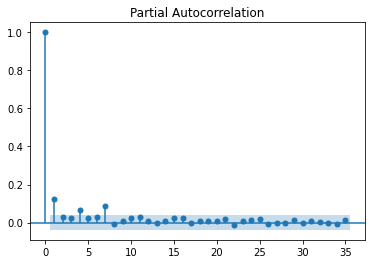

In [23]:
plot_pacf(df2['Ysq']);

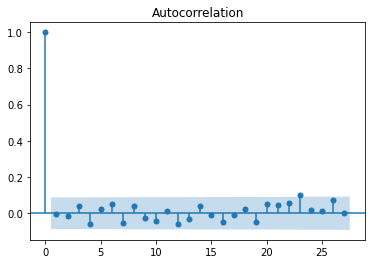

In [22]:
noise_sq = np.random.randn(500)**2
plot_acf(noise_sq);

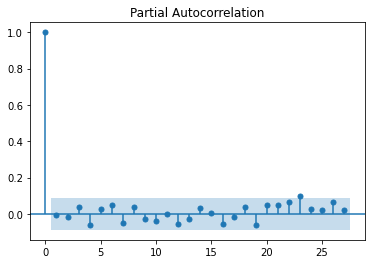

In [27]:
plot_pacf(noise_sq);

### Train-Test Split

In [29]:
Ntest = 500
train = df2.iloc[:-Ntest][['LogRet']].copy()
test = df2.iloc[-Ntest:][['LogRet']].copy()



### Why do we need scalling ? 

#### first step: build the model
from arch import arch_model
model = arch_model(
    y = train_data, # ex.log returns
    x= None, # exogenous data
    mean = 'Constant', # mean model type, ex. zero, arx
    vol = 'GARCH', # type of model, ex.ARCH, EGARCH
    p = 1, # as defined in this course
    q = 1, # ignored if model is ARCH
    dit = 'NORMAL' # distribution, ex. StudentsT
)

#### second step: fit the model
result = model.fit()
rsult.summary()

#### third step: forecasr result

In [32]:
model = arch_model(train['LogRet'], vol= 'GARCH', p =1, q = 1)

In [33]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.6909596493772982e+16
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4364922.881176198
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1793.5801982985008
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4047.6000058632776
            Iterations: 3
            Function evaluations: 34
            Gradient evaluations: 3


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001563. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


#### ARCH(1)

In [34]:
m = train['LogRet'].mean()
s = test['LogRet'].std()
train['Scaled'] = (train['LogRet'] - m) / s
test['Scaled'] = (test['LogRet'] - m ) / s
df2['Scaled'] = (df2['LogRet'] - m) / s

In [35]:
arch1 = arch_model(train['Scaled'],vol = 'ARCH', p =1)

In [36]:
res_arch1 = arch1.fit(update_freq=10)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2998.3070000575026
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7


In [37]:
res_arch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2998.31
Distribution:                  Normal   AIC:                           6002.61
Method:            Maximum Likelihood   BIC:                           6019.60
                                        No. Observations:                 2124
Date:                Sun, Nov 28 2021   Df Residuals:                     2123
Time:                        00:27:25   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.3566e-03  2.099e-02      0.255      0.799 [-3.579e-02,4.650e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8585      0.109      7.855  3.992e-15   [  0.644,  1.073]
alpha[1]       0.1754  5.117e-02      3.428  6.090e-04 [7.510e-02,  0.276]
==========================================================================

Covariance estimator: robust
"""

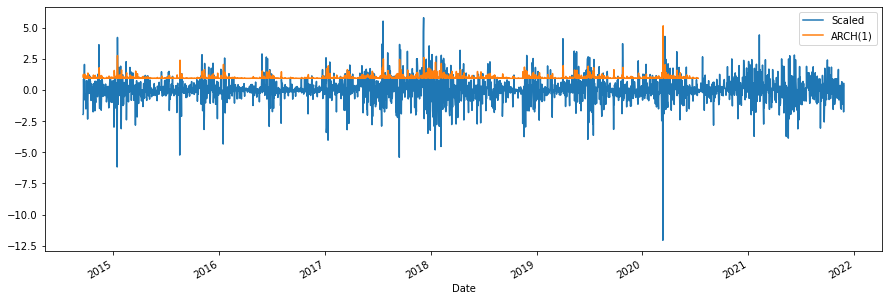

In [38]:
df2['ARCH(1)'] = res_arch1.conditional_volatility
df2[['Scaled','ARCH(1)']].plot(figsize = (15,5));

In [39]:
res_arch1.forecast(horizon= Ntest)

C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [40]:
fcast_arch1 = res_arch1.forecast(horizon= Ntest, reindex= True)

In [41]:
fcast_arch1


In [42]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
fcast_arch1.residual_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
fcast_arch1 = res_arch1.forecast(horizon = Ntest, reindex =False)

In [50]:
fcast_arch1.mean

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-12,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,...,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357,0.005357


In [51]:
fcast_arch1.variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-12,0.859074,1.009149,1.035472,1.040089,1.040899,1.041041,1.041066,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072


In [52]:
fcast_arch1.residual_variance

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-12,0.859074,1.009149,1.035472,1.040089,1.040899,1.041041,1.041066,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072


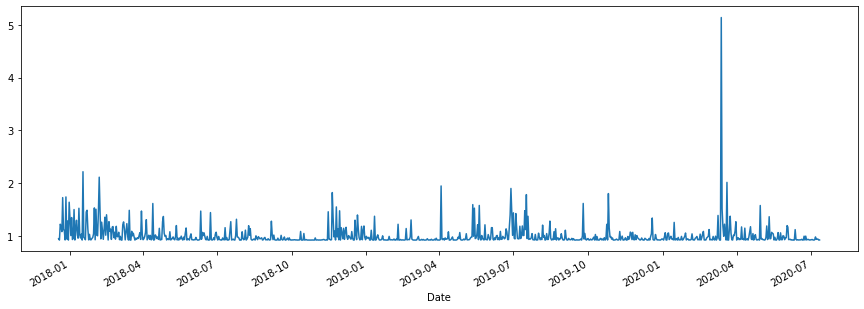

In [66]:
df2.loc['2017-12-18':]['ARCH(1)'].plot(figsize=(15,5));

In [68]:
fcast_arch1 = res_arch1.forecast(horizon = Ntest, reindex = True, start = '2017-12-02')

In [69]:
fcast_arch1.variance['2017-11-28':'2017-12-28']

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.491,h.492,h.493,h.494,h.495,h.496,h.497,h.498,h.499,h.500
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-02,0.864812,1.010155,1.035649,1.040120,1.040905,1.041042,1.041066,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072
2017-12-03,0.908139,1.017755,1.036982,1.040354,1.040946,1.041049,1.041068,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072
2017-12-04,0.946854,1.024545,1.038173,1.040563,1.040982,1.041056,1.041069,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072
2017-12-05,0.907260,1.017601,1.036955,1.040349,1.040945,1.041049,1.041068,1.041071,1.041071,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072
2017-12-06,4.664452,1.676625,1.152550,1.060625,1.044501,1.041673,1.041177,1.041090,1.041075,1.041072,...,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072,1.041072


In [70]:
fcast_arch1.variance.loc['2017-12-02'].to_numpy().shape

(500,)

In [71]:
df2.index.get_loc('2017-12-02')

1171

In [72]:
df2.index[1171+500]

Timestamp('2019-04-16 00:00:00')

In [84]:
df2.loc['2017-12-03':'2019-04-16','ARCH(1) Forecast'] = np.sqrt(fcast_arch1.variance.loc['2017-12-02'].to_numpy())

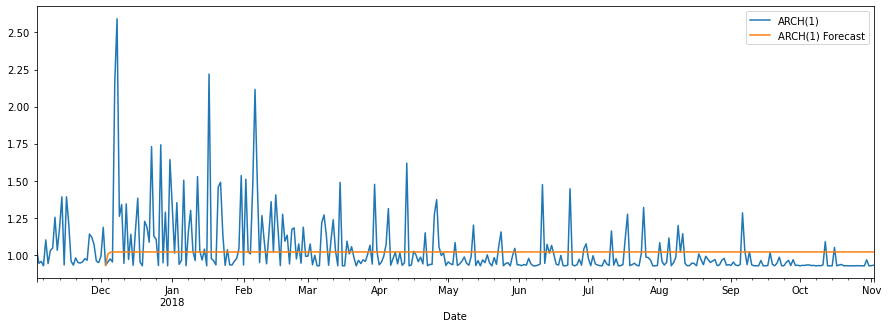

In [75]:
df2.loc['2017-11-03':'2018-11-02'][['ARCH(1)', 'ARCH(1) Forecast']].plot(figsize=(15,5));

In [76]:
fcast_arch1.variance.index.get_loc('2017-11-10')

1149

In [77]:
df2.index[1149+500]

Timestamp('2019-03-25 00:00:00')

In [78]:
df2.loc['2017-12-03':'2019-04-16','ARCH(1) Forecast Low'] = np.sqrt(
fcast_arch1.variance.loc['2017-12-02'].to_numpy())

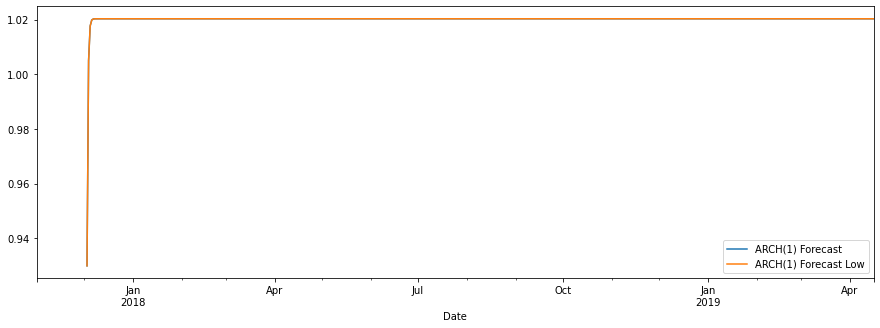

In [86]:
plot_cols = ['ARCH(1) Forecast', 'ARCH(1) Forecast Low']
df2.loc['2017-11-01':'2019-04-16'][plot_cols].plot(figsize=(15, 5));

In [85]:
# theoretical unconditional variance
res_arch1.params

mu          0.005357
omega       0.858464
alpha[1]    0.175403
Name: params, dtype: float64

In [87]:
res_arch1.params['omega'] / (1 - res_arch1.params['alpha[1]'])

1.0410715652638047

In [89]:
fcast_arch1.variance.loc['2017-12-10'].to_numpy()[-1]

1.0410715652638047

In [91]:
fcast_arch1.variance.loc['2017-12-03'].to_numpy()[-1]

1.0410715652638047

#### Garch (1,1)

In [92]:
garch11 = arch_model(train['Scaled'], vol='GARCH', p=1, q=1)

In [93]:
res_garch11 = garch11.fit(update_freq=10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 2842.5571648209034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2842.557158832881
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


In [94]:
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2842.56
Distribution:                  Normal   AIC:                           5693.11
Method:            Maximum Likelihood   BIC:                           5715.76
                                        No. Observations:                 2124
Date:                Sun, Nov 28 2021   Df Residuals:                     2123
Time:                        09:53:48   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0104  1.954e-02      0.531      0.595 [-2.792e-02,4.868e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0509  1.965e-02      2.590  9.603e-03 [1.238e-02,8.942e-02]
alpha[1]       0.1628  4.545e-02      3.583  3.399e-04   [7.375e-02,  0.252]
beta[1]        0.8109  2.886e-02     28.102 9.242e-174     [  0.754,  0.867]
============================================================================

Covariance estimator: robust
"""

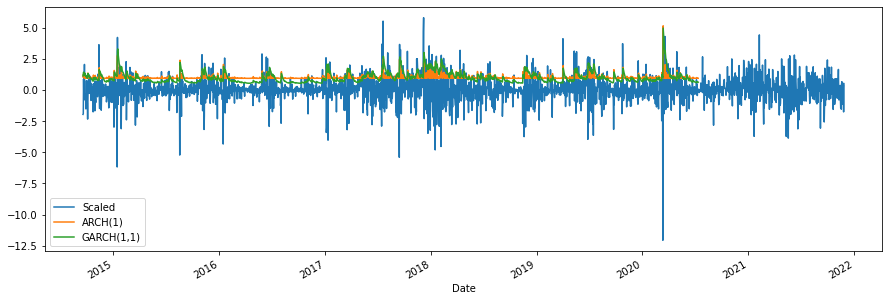

In [95]:
df2['GARCH(1,1)'] = res_garch11.conditional_volatility
df2[['Scaled', 'ARCH(1)', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [96]:
fcast_garch11 = res_garch11.forecast(
    horizon=Ntest, reindex=False, start='2017-11-03')

In [98]:
df2.loc['2017-12-03':'2019-04-16', 'GARCH(1,1) Forecast'] = np.sqrt(
    fcast_garch11.residual_variance.loc['2017-11-03'].to_numpy())

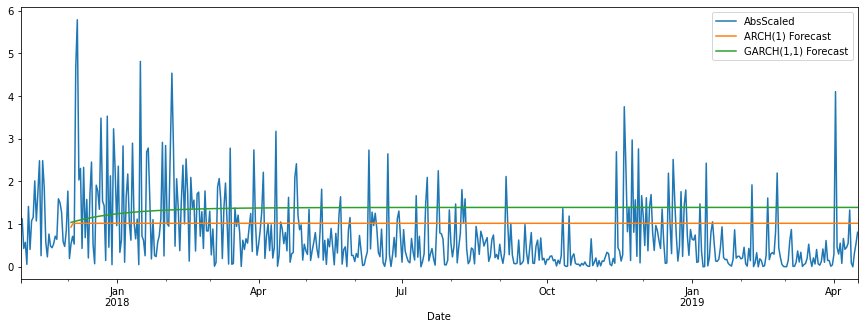

In [100]:
df2['AbsScaled'] = df2['Scaled'].abs()

plot_cols = ['AbsScaled', 'ARCH(1) Forecast', 'GARCH(1,1) Forecast']
df2.loc['2017-11-01':'2019-04-16'][plot_cols].plot(figsize=(15, 5));

### t-Distribution

In [101]:
garch11t = arch_model(train['Scaled'], vol='GARCH', p=1, q=1, dist='StudentsT')

In [102]:
res_garch11t = garch11t.fit(update_freq=10)

Iteration:     10,   Func. Count:     76,   Neg. LLF: 2514.364945896727
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2484.8804322985097
            Iterations: 19
            Function evaluations: 130
            Gradient evaluations: 19


In [103]:
res_garch11t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2484.88
Distribution:      Standardized Student's t   AIC:                           4979.76
Method:                  Maximum Likelihood   BIC:                           5008.07
                                              No. Observations:                 2124
Date:                      Sun, Nov 28 2021   Df Residuals:                     2123
Time:                              10:02:22   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.8742e-03  1.019e-02      0.282      0.778 [-1.710e-02,2.285e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0109  7.511e-03      1.445      0.148 [-3.865e-03,2.558e-02]
alpha[1]       0.1279  1.949e-02      6.564  5.239e-11    [8.972e-02,  0.166]
beta[1]        0.8721  2.713e-02     32.140 1.215e-226      [  0.819,  0.925]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.1944      0.153     20.811  3.415e-96 [  2.894,  3.495]
========================================================================

Covariance estimator: robust
"""

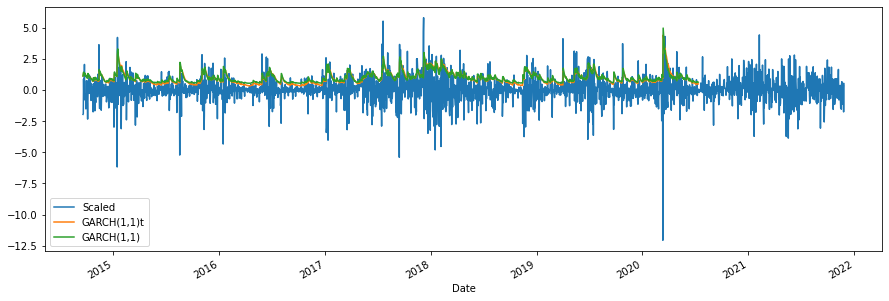

In [104]:
df2['GARCH(1,1)t'] = res_garch11t.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(1,1)']].plot(figsize=(15, 5));

In [105]:
fcast_garch11t = res_garch11t.forecast(
    horizon=Ntest, reindex=False, start='2017-11-03')

In [106]:
df2.loc['2017-12-03':'2019-04-16', 'GARCH(1,1)t Forecast'] = np.sqrt(
    fcast_garch11t.residual_variance.loc['2017-12-03'].to_numpy())

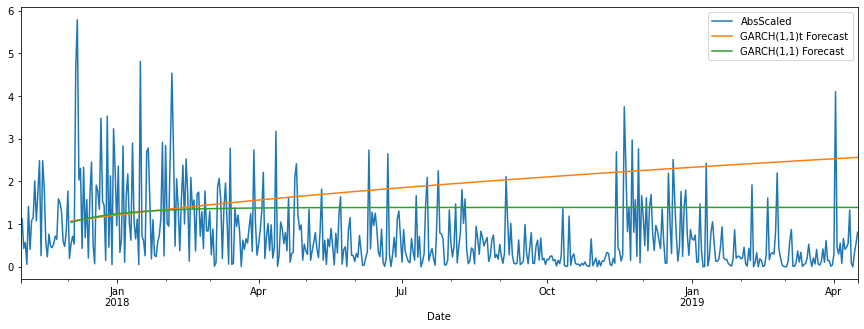

In [107]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(1,1) Forecast']
df2.loc['2017-11-01':'2019-04-16'][plot_cols].plot(figsize=(15, 5));

#### GARCH (p,q)

In [110]:
garchpq = arch_model(train['Scaled'], p=8, q=5, dist='StudentsT')

In [111]:
res_garchpq = garchpq.fit(update_freq=10)

Iteration:     10,   Func. Count:    184,   Neg. LLF: 2641.3951944119126
Iteration:     20,   Func. Count:    364,   Neg. LLF: 2480.3110031607357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2480.3071668468283
            Iterations: 26
            Function evaluations: 476
            Gradient evaluations: 26


In [112]:
res_garchpq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Scaled   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2480.31
Distribution:      Standardized Student's t   AIC:                           4992.61
Method:                  Maximum Likelihood   BIC:                           5083.19
                                              No. Observations:                 2124
Date:                      Sun, Nov 28 2021   Df Residuals:                     2123
Time:                              10:25:53   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.9458e-03  1.003e-02      0.294      0.769 [-1.671e-02,2.260e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0344  1.559e-02      2.209  2.720e-02  [3.875e-03,6.497e-02]
alpha[1]       0.2078  3.710e-02      5.602  2.117e-08      [  0.135,  0.281]
alpha[2]       0.0535      0.115      0.463      0.643      [ -0.173,  0.280]
alpha[3]       0.0683      0.132      0.516      0.606      [ -0.191,  0.328]
alpha[4]       0.0701      0.131      0.535      0.593      [ -0.187,  0.327]
alpha[5]       0.0000      0.138      0.000      1.000      [ -0.270,  0.270]
alpha[6]   1.8207e-09  7.728e-02  2.356e-08      1.000      [ -0.151,  0.151]
alpha[7]       0.0312  2.599e-02      1.200      0.230 [-1.976e-02,8.212e-02]
alpha[8]       0.0142  4.395e-02      0.323      0.747   [-7.196e-02,  0.100]
beta[1]    9.4799e-10      0.556  1.706e-09      1.000      [ -1.089,  1.089]
beta[2]        0.0000      0.673      0.000      1.000      [ -1.320,  1.320]
beta[3]        0.0000      0.695      0.000      1.000      [ -1.362,  1.362]
beta[4]        0.2950      0.716      0.412      0.680      [ -1.109,  1.699]
beta[5]        0.2599      0.533      0.488      0.626      [ -0.784,  1.304]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.2278      0.150     21.542 6.305e-103 [  2.934,  3.521]
========================================================================

Covariance estimator: robust
"""

In [113]:
res_arch1.aic, res_garch11.aic, res_garch11t.aic, res_garchpq.aic

(6002.614000115005, 5693.114317665762, 4979.7608645970195, 4992.614333693657)

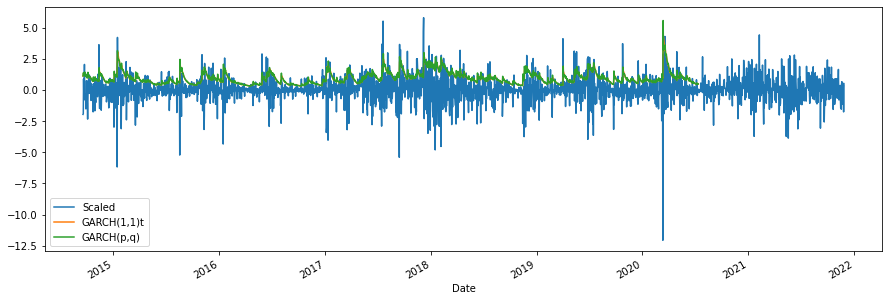

In [114]:
df2['GARCH(p,q)'] = res_garchpq.conditional_volatility
df2[['Scaled', 'GARCH(1,1)t', 'GARCH(p,q)']].plot(figsize=(15, 5));

In [115]:
fcast_garchpq = res_garchpq.forecast(
    horizon=Ntest, reindex=False, start='2017-11-03')

In [116]:
df2.loc['2017-12-03':'2019-04-16', 'GARCH(p,q) Forecast'] = np.sqrt(
    fcast_garch11t.variance.loc['2017-12-03'].to_numpy())

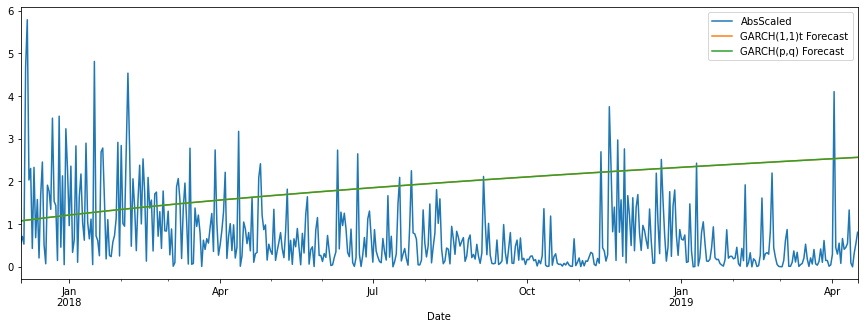

In [117]:
plot_cols = ['AbsScaled', 'GARCH(1,1)t Forecast', 'GARCH(p,q) Forecast']
df2.loc['2017-12-03':'2019-04-16'][plot_cols].plot(figsize=(15, 5));

In [118]:
train_idx = df2.index <= train.index[-1]
test_idx = ~train_idx

In [119]:
df2.loc[train_idx, 'GARCH(p,q) Train'] = res_garchpq.conditional_volatility
df2.loc[test_idx, 'GARCH(p,q) Test'] = np.sqrt(
    fcast_garchpq.variance.iloc[-1].to_numpy())

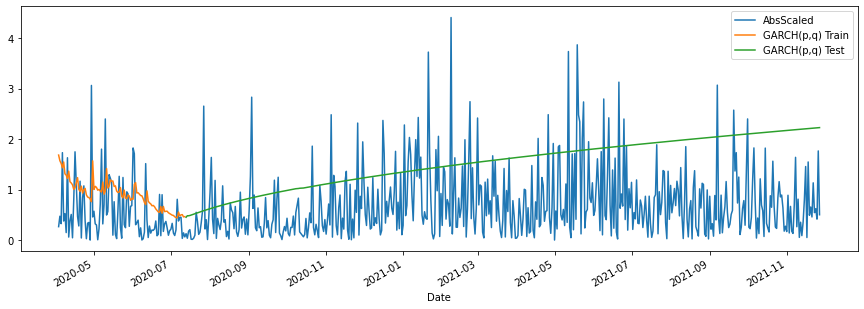

In [120]:
plot_cols = ['AbsScaled', 'GARCH(p,q) Train', 'GARCH(p,q) Test']
df2.iloc[-(Ntest+100):][plot_cols].plot(figsize=(15, 5));